In [1]:
!pip install lightkurve --upgrade
print("lightkurve installed!")

Requirement already up-to-date: lightkurve in c:\users\lokes\anaconda3\lib\site-packages (1.1.1)
lightkurve installed!


In [2]:
!pip install pycodestyle flake8 pycodestyle_magic
%load_ext pycodestyle_magic

In [3]:
%cd \repos\Kepler_Data_Analysis
%pwd

C:\repos\Kepler_Data_Analysis


'C:\\repos\\Kepler_Data_Analysis'

In [4]:
import lightkurve as lk
import pandas as pd
import pathlib
import os
import matplotlib.pyplot as plt
import logging
import numpy as np
import matplotlib.lines as mlines
from collections import OrderedDict
import matplotlib.image as mpimg
#from google.colab import files
%matplotlib inline
print("Imports done.")

Imports done.


In [5]:
linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

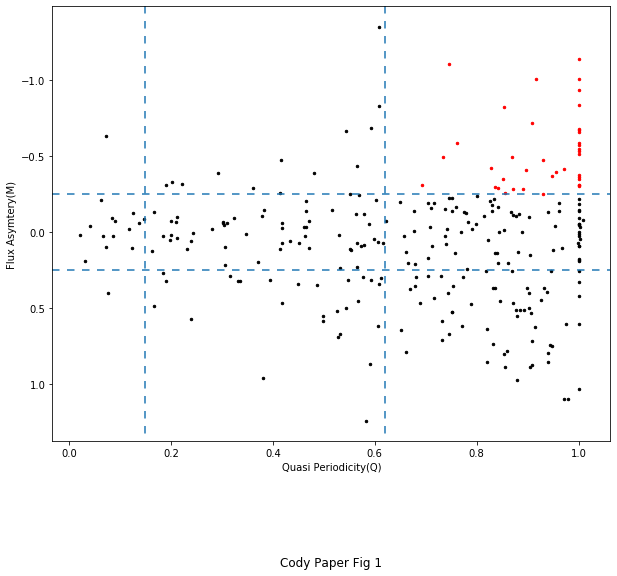

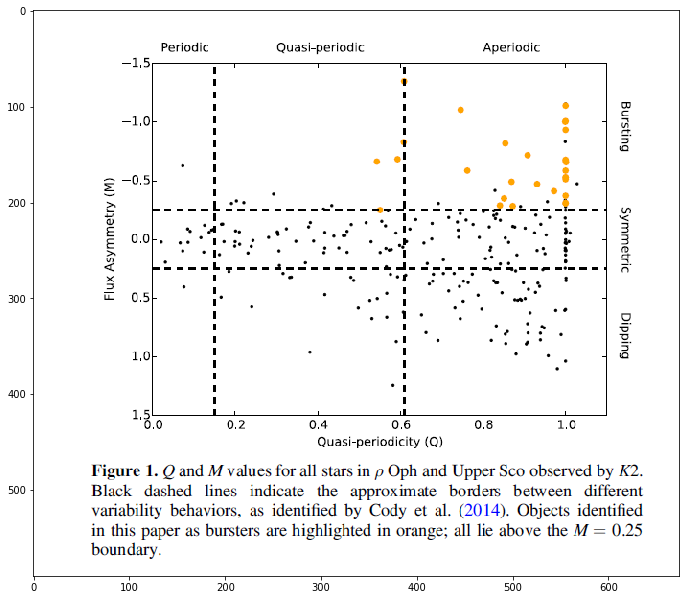

In [6]:
# %%flake8

# raw file in the repo has one or more space separartion between the entries
base = 'https://raw.githubusercontent.com/SparshJohri/'
base += 'Kepler_Data_Analysis/master/'
M_file = base + 'USco_yesdisks_flux_M_edited.dat'
Q_file = base + 'USco_yesdisks_Q_edited.dat'

M = pd.read_csv(M_file, sep=r'\s+')
Q = pd.read_csv(Q_file, sep=r'\s+')

# print(M.info())

M_series = M['M']
Q_series = Q['Q']

bnd_y1 = -0.25
bnd_y2 = 0.25
bnd_x1 = 0.62
bnd_x2 = 0.15

filt = np.ones(len(M_series), dtype='bool')
for i in range(len(M_series)):
    filt[i] = M_series[i] < bnd_y1 and Q_series[i] > bnd_x1
# print(filt)
# print(len(filt))

M_bursting = M_series[filt]
Q_bursting = Q_series[filt]
M_series = M_series[filt == False]
Q_series = Q_series[filt == False]
      
# print(filt)
#M_burst = M_series[filt] 
sz=6
plt.scatter(Q_series , M_series, color='black',s=sz)
plt.scatter(Q_bursting , M_bursting, color='red',s=sz)
plt.title('Cody Paper Fig 1',y=-0.3)
plt.xlabel('Quasi Periodicity(Q)')
plt.ylabel('Flux Asymtery(M)')
plt.gca().invert_yaxis()

xmin, xmax = plt.gca().get_xbound()
ymin, ymax = plt.gca().get_ybound()
l1 = mlines.Line2D((xmin,xmax),(bnd_y1,bnd_y1),linestyle=linestyles['dashed'])
l2 = mlines.Line2D((xmin,xmax),(bnd_y2,bnd_y2),linestyle=linestyles['dashed'])
l3 = mlines.Line2D((bnd_x1,bnd_x1),(ymin,ymax),linestyle=linestyles['dashed'])
l4 = mlines.Line2D((bnd_x2,bnd_x2),(ymin,ymax),linestyle=linestyles['dashed'])
line_set = [l1,l2,l3,l4]
sz =[10,8]
plt.gcf().set_size_inches(sz[0],sz[1])


for i in line_set :
    plt.gca().add_line(i)
plt.show()

img= 'CodyPaperFig1.png'
scale = 1.3
plt.gcf().set_size_inches(sz[0]*scale,sz[1]*scale)
plt.imshow(mpimg.imread(img))
plt.show()
